In [42]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set theme

sns.set_theme()

## Reading and Exploring Data

In [3]:
# Read the dataset that will be used for the project

# Player DataFrame
adv = pd.read_csv('../Data/Advanced.csv')
pas = pd.read_csv('../Data/Player Award Shares.csv')

In [4]:
# Checking for null values for player df

adv = adv.drop('birth_year', axis=1)
pt = pt.drop('birth_year', axis=1)

# Missing ages can be filled with avg league age
adv['age'] = adv['age'].fillna(value=adv['age'].mean())
pt['age'] = pt['age'].fillna(value=pt['age'].mean())


# Any other missing value is a stat that can be filled with 0
adv = adv.fillna(0)
pt = pt.fillna(0)

print(adv.isnull().sum())
print(pt.isnull().sum())

#No missing values from our DataFrames

seas_id        0
season         0
player_id      0
player         0
pos            0
age            0
experience     0
lg             0
tm             0
g              0
mp             0
per            0
ts_percent     0
x3p_ar         0
f_tr           0
orb_percent    0
drb_percent    0
trb_percent    0
ast_percent    0
stl_percent    0
blk_percent    0
tov_percent    0
usg_percent    0
ows            0
dws            0
ws             0
ws_48          0
obpm           0
dbpm           0
bpm            0
vorp           0
dtype: int64
seas_id         0
season          0
player_id       0
player          0
pos             0
age             0
experience      0
lg              0
tm              0
g               0
gs              0
mp              0
fg              0
fga             0
fg_percent      0
x3p             0
x3pa            0
x3p_percent     0
x2p             0
x2pa            0
x2p_percent     0
e_fg_percent    0
ft              0
fta             0
ft_percent      0
orb       

In [407]:
# Merge Advanced, Player Awards Share and Player Totals DataFrame into one Player DataFrame
player = adv.merge(pt,on=['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience', 'lg', 'tm', 'g', 'mp'])
player

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31136,2024,5025,A.J. Green,SG,24.0,2,NBA,MIL,56,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,31137,2024,5026,A.J. Lawson,SG,23.0,2,NBA,DAL,42,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,31138,2024,5027,AJ Griffin,SF,20.0,2,NBA,ATL,20,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,31139,2024,4219,Aaron Gordon,PF,28.0,10,NBA,DEN,73,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,31140,2024,4582,Aaron Holiday,PG,27.0,6,NBA,HOU,78,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31865,200,1947,157,Walt Miller,F,31.0,1,BAA,PIT,12,...,0.500,0.0,0.0,0.0,6,0.0,0.0,0.0,16,23
31866,201,1947,158,Warren Fenley,F,24.0,1,BAA,BOS,33,...,0.511,0.0,0.0,0.0,16,0.0,0.0,0.0,59,85
31867,202,1947,159,Wilbert Kautz,G-F,31.0,1,BAA,CHS,50,...,0.534,0.0,0.0,0.0,37,0.0,0.0,0.0,114,253
31868,203,1947,160,Woody Grimshaw,G,27.0,1,BAA,PRO,21,...,0.477,0.0,0.0,0.0,1,0.0,0.0,0.0,25,61


In [464]:
# Dropping irrelevant rows

# Drop rows that aren't NBA
player = player[player['lg'] == 'NBA']
# Drop rows before the 1994 season
player = player[player['season'] >= 1994]

#Outputing our column names
player.columns

Index(['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience',
       'lg', 'tm', 'g', 'mp', 'per', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'gs', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

## 1 - The Lowest Avg Team Age VS. The Highest Avg Team Age for Each Year

#### Gathering Necessary Data

In [279]:
#Grouping data based on the season (year), the team they play on and their age
age = player.groupby(['season', 'tm'])['age'].mean()
age = age.reset_index()
lows = []
highs = []

#Finding the lowest average age and the highest average age from out new df
for i in age['season'].unique():
    low = age.loc[age.season == i, 'age'].idxmin()
    lows.append(low)
    high = age.loc[age.season == i, 'age'].idxmax()
    highs.append(high)

#Creating a new column in order to identify if it's the highest or lowest average
df_2 = age.iloc[age.index.isin(lows)]
df_2['pos'] = 'Lowest'
df_3 = age.iloc[age.index.isin(highs)]
df_3['pos'] = 'Highest'

frames = [df_2, df_3]
new_age = pd.concat(frames)

#### Visualization

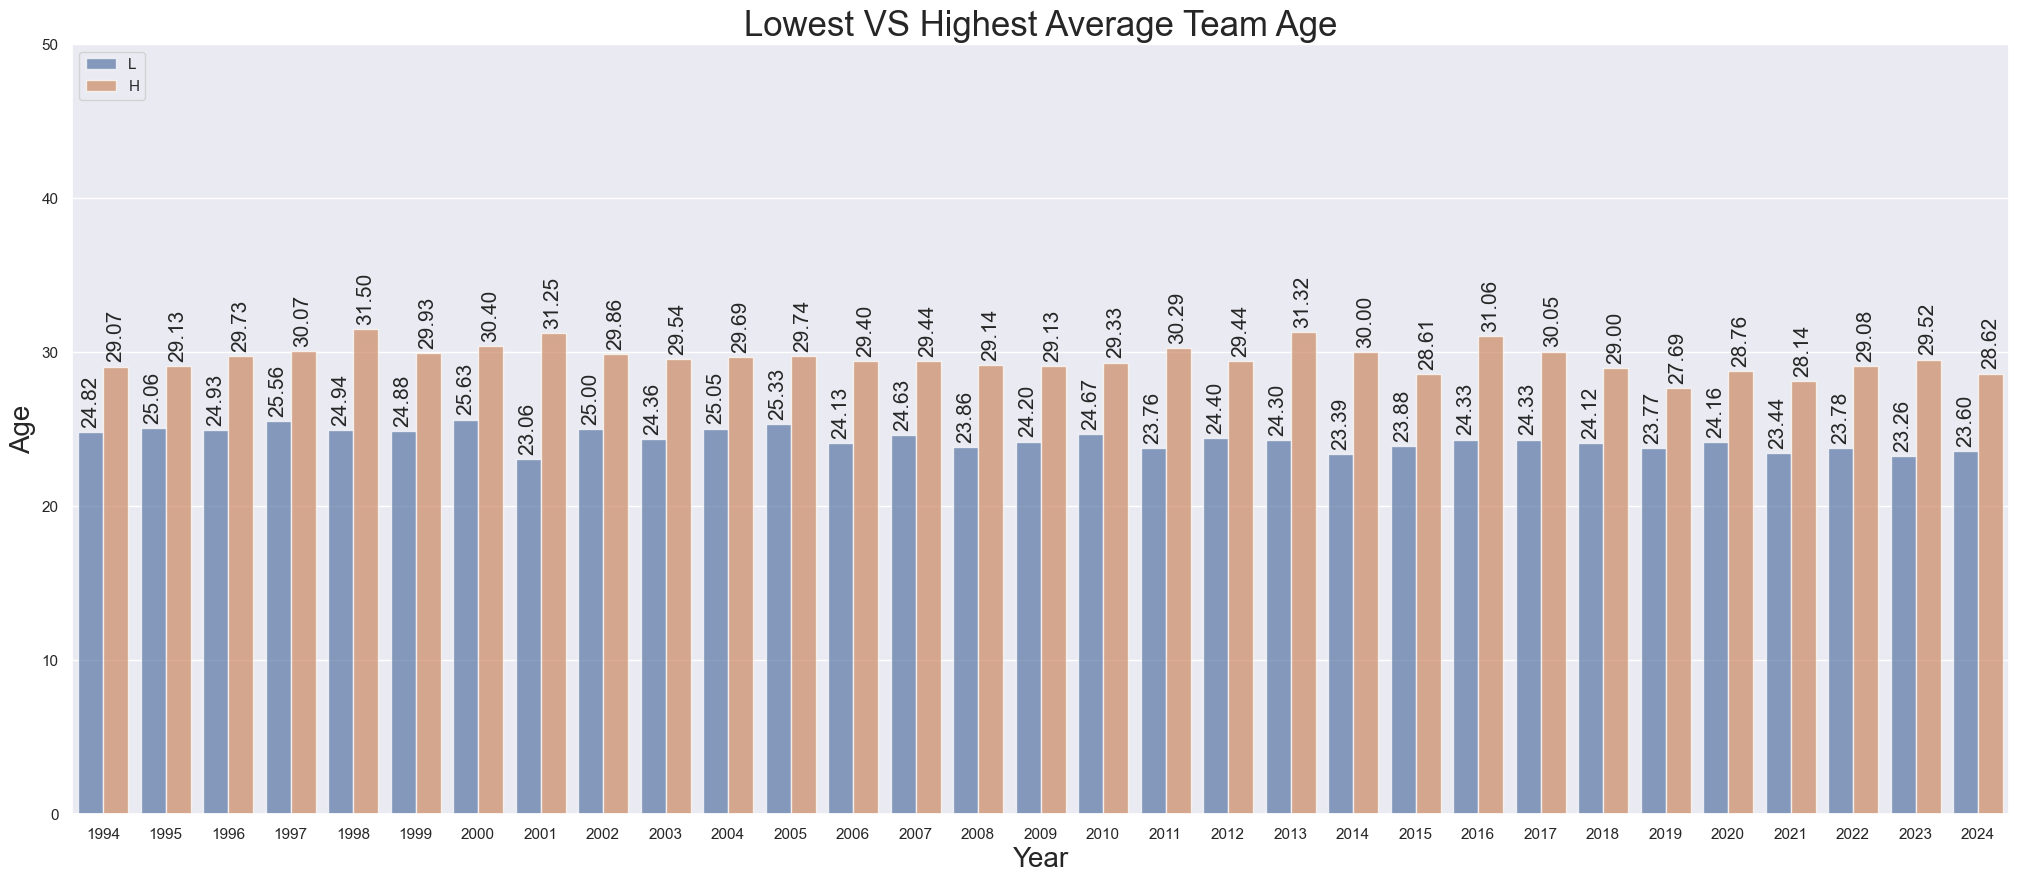

In [142]:
#Creating a bar plot for each year from 1994 to 2024 with low and high average
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x = 'season', y = 'age', hue = 'pos', data = data, width=0.8, alpha=0.7)
ax.bar_label(ax.containers[0], fontsize=15, padding=3, rotation=90, fmt='{:,.2f}') #Avg on top of low bar
ax.bar_label(ax.containers[1], fontsize=15, padding=3, rotation=90, fmt='{:,.2f}') #Avg on top of high bar
ax.set_ylabel('Age', fontsize=20) #Setting y label name
ax.set_xlabel('Year', fontsize=20) #Setting x label name
plt.ylim(0,50) #Age limit
ax.legend(loc='upper left');
plt.title('Lowest VS Highest Average Team Age', fontsize=25); #Setting a title for out barplot

## 2 - Percentage of Players in the NBA From Ages 20 to 30

#### Gathering Necessary Data

In [427]:
#Grouping our data based on their ages and counting the number of players at that age
pie = player.groupby('age').count()
pd.DataFrame(pie_age)
pie.reset_index(inplace=True)
pie['age'] = pie['age'].astype(int) #Age from float to integer
pie2 = pie[(pie['age'] <=30) & (pie['age'] >= 20)] #Making sure our dataset is from age 20 to 30
pie2['percent'] = (pie['player'] / pie['player'].sum()) * 100 #Putting our output in percentage format

#### Visualization

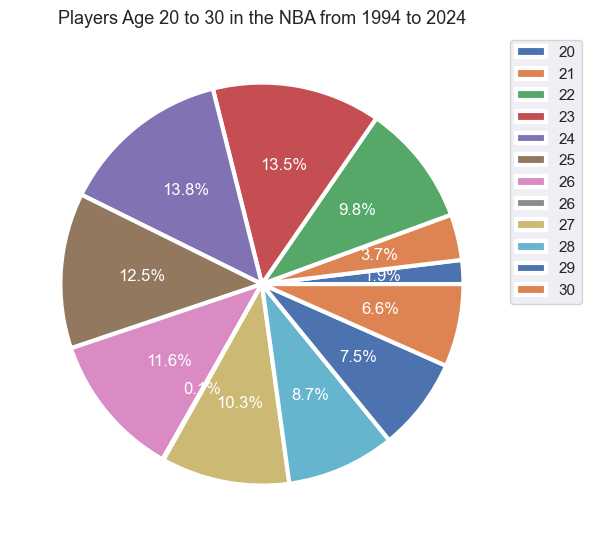

In [428]:
#Creating a piechart to illustrate the results
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(pie2['player'], autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
       textprops={'size': 'medium', 'color': 'white'})

plt.legend(labels= pie2['age'],loc=1, bbox_to_anchor=(1.15,1)) #Adding a legend with the ages
plt.title('Players Age 20 to 30 in the NBA from 1994 to 2024', fontsize=13) #Adding a title to out piechart
plt.tight_layout();

## 3 - Top 10 Teams with the Most Amount of Unique Players in the Last 30 Years

#### Gathering Necessary Data

In [323]:
#Grouping players based on their teams and making sure
#their name is only there once even they are on the team more than one year
data = player.groupby('tm')['player'].nunique()
data = pd.DataFrame(data).reset_index()
data = data.sort_values(['player'], ascending=False).head(11) #Sorting our dataframe in descending order based on players
data.drop(data.head(1).index, inplace=True)
data.reset_index()

,index,tm,player
0,63,NYK,539
1,5,BOS,514
2,68,PHI,509
3,22,DET,491
4,45,MIL,455
5,18,CLE,451
6,2,ATL,443
7,41,LAL,436
8,69,PHO,432
9,30,GSW,423


#### Visualization

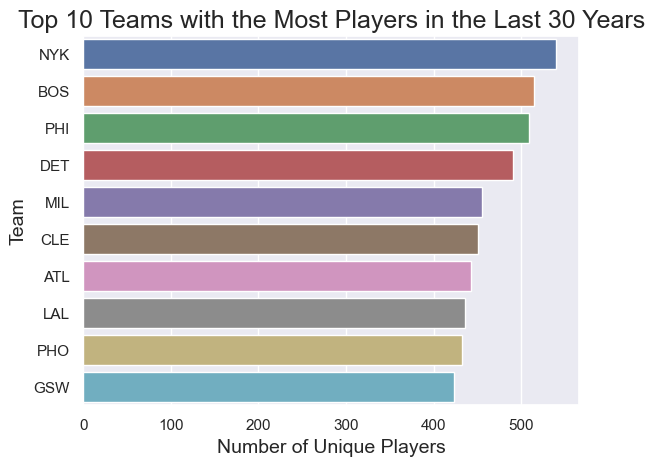

In [324]:
#Creating a barplot to illustrate the teams with the most number of unique players
ax = sns.barplot(x = 'player', y='tm', data = data)
ax.set_ylabel('Team', fontsize=14) #Setting y label (Team)
ax.set_xlabel('Number of Unique Players', fontsize=14) #Setting x label (# of players)
ax.set_title('Top 10 Teams with the Most Players in the Last 30 Years', fontsize=18); #Setting title

## 4 - Total Number of Points per Team in the Last 5 Years

#### Gathering Necessary Data

In [404]:
tens = player[player['season'] > 2019] # Only data from last 5 years (2020-2024)
#Grouping our data by team and points per season
ten = tens.groupby(['tm', 'season'])['pts'].sum()
ten = pd.DataFrame(ten).reset_index()
ten = ten[ten['tm'] != 'TOT'] # Remove TOTAL from team column
ten = ten.pivot_table(index=['tm'], columns=['season'], values='pts') #Making seasons as columns with pts as values
ten = ten.rename_axis(None, axis=1)
ten.reset_index(inplace=True)

#### Visualization

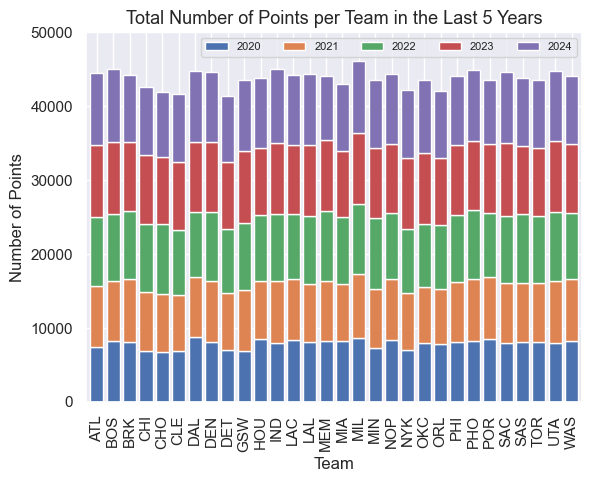

In [460]:
#Crating a bar plot to illustrate how many points were scored each season per team
ten.plot(x='tm', kind='bar', stacked=True, width= 0.8)
plt.title('Total Number of Points per Team in the Last 5 Years', fontsize=13) #Setting title
plt.xlabel('Team') #Setting x label (Team)
plt.ylabel('Number of Points') #Setting y label (# of pts)
plt.ylim(0, 50000) #Setting the y limit to 50k pts
plt.legend(loc ='best', ncol=5, fontsize=8) #Horizontal legend colors and corresponding year
plt.show();

## 5 - Relationship Between Age and Points per Game Based on Player Position in the Last 20 Years

#### Gathering Necessary Data

In [458]:
#Players where Position is either PG,SG,PF or C
scat = player[(player['pos'] == 'PG') | (player['pos'] == 'SG') | (player['pos'] == 'PF') | (player['pos'] == 'C')]
scat = scat[scat['season'] >= 2014] #Data from the last 10 years
scat = scat[['player', 'pos', 'pts', 'ft_percent']]
scat['ft_percent'] = scat['ft_percent'] * 100 #Convert from decimal to percentage

#### Visualization

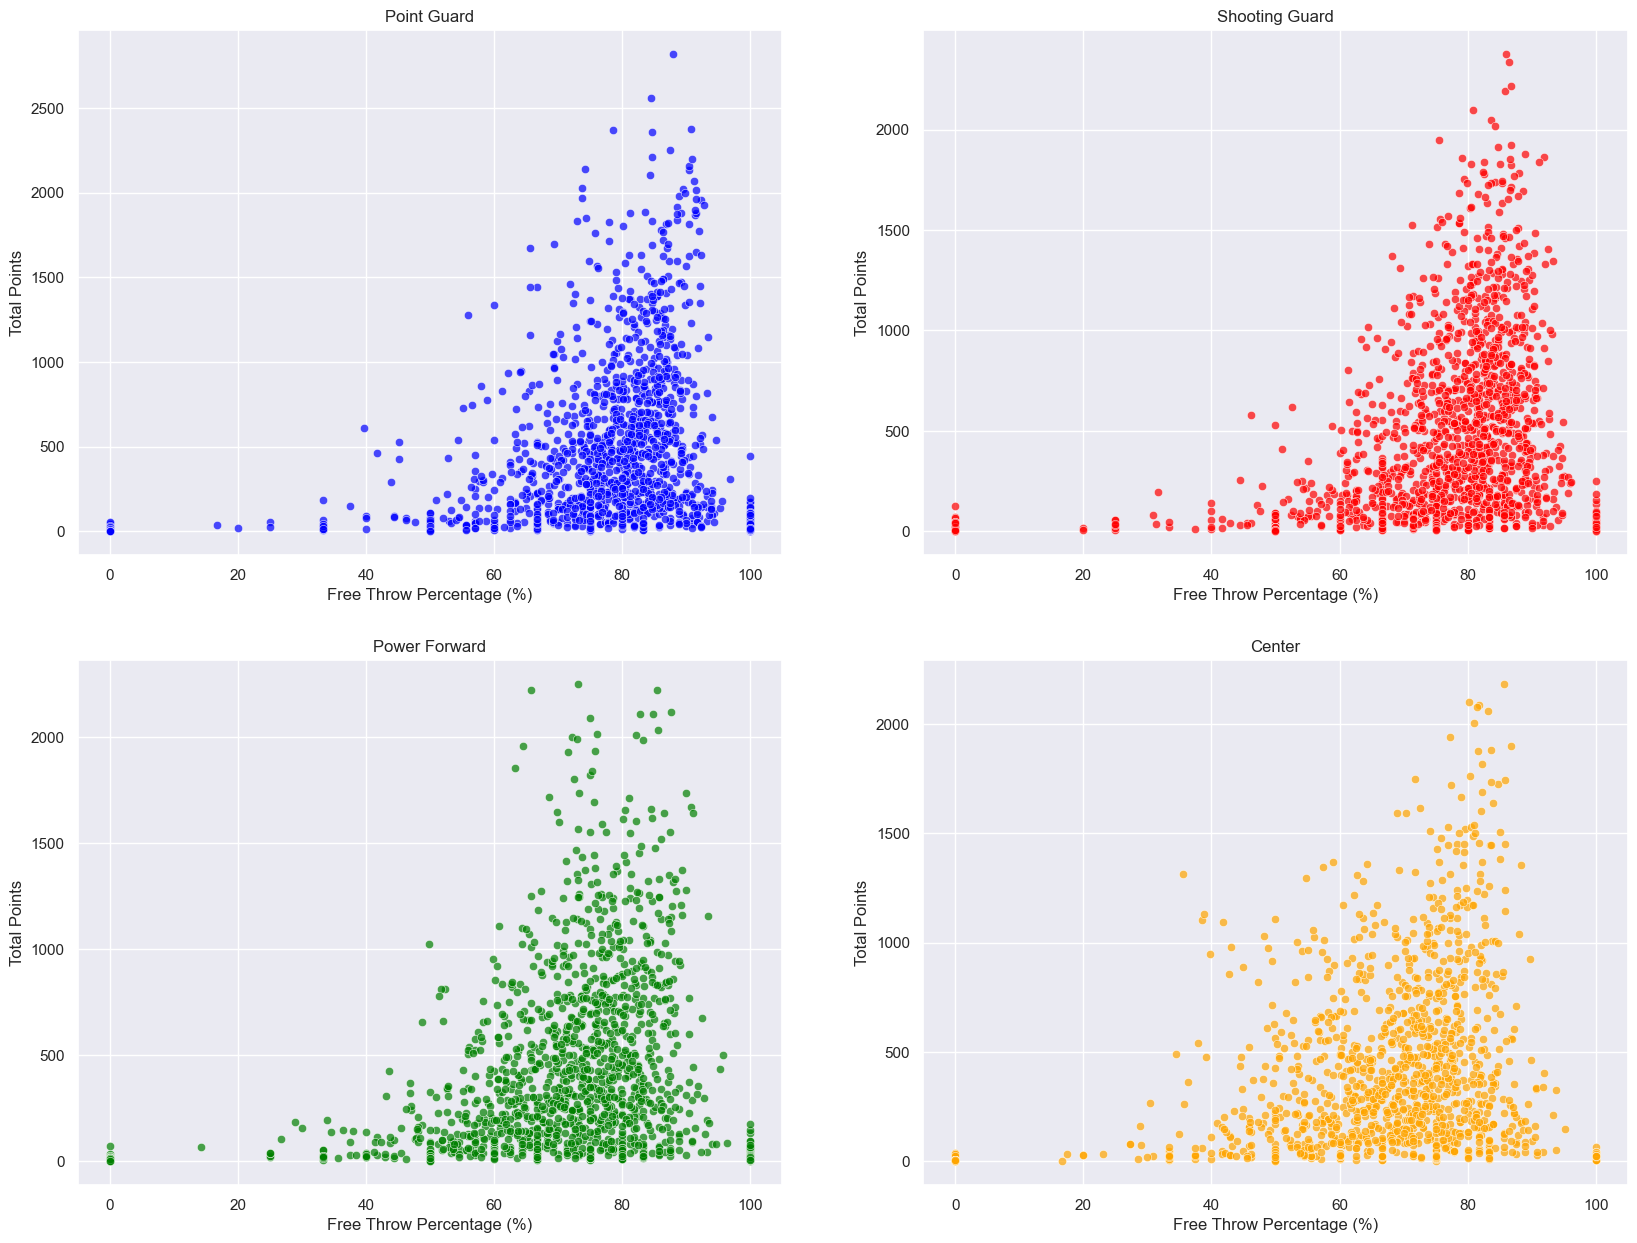

In [459]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

#Plotting in grid based on position
#First grid for point guards (PG)
ax_1 = sns.scatterplot(data= scat[scat['pos']=='PG'], x='ft_percent', y='pts', ax=ax1, color='blue', alpha=0.7)
ax_1.set(xlabel ='Free Throw Percentage (%)', ylabel='Total Points', title='Point Guard');
#Second grid for shooting guards (SG)
ax_2 = sns.scatterplot(data= scat[scat['pos']=='SG'], x='ft_percent', y='pts', ax=ax2, color='red', alpha=0.7)
ax_2.set(xlabel ='Free Throw Percentage (%)', ylabel='Total Points', title='Shooting Guard');
#Third grid for power forwards (PF)
ax_3 = sns.scatterplot(data= scat[scat['pos']=='PF'], x='ft_percent', y='pts', ax=ax3, color='green', alpha=0.7)
ax_3.set(xlabel ='Free Throw Percentage (%)', ylabel='Total Points', title='Power Forward');
#Fourth grid for centers (C)
ax_4 = sns.scatterplot(data= scat[scat['pos']=='C'], x='ft_percent', y='pts', ax=ax4, color='orange', alpha=0.7)
ax_4.set(xlabel ='Free Throw Percentage (%)', ylabel='Total Points', title='Center');

## 6 - Visualizing the relationship between "field goal percentage" and "field goal attempt" for players in their 10th or 11th season.

#### Gathering Necessary Data

In [524]:
# Data from players in their 10th or 11th season
six = player[(player['experience'] == 10) | (player['experience'] == 11)]
six['fg_percent'] = six['fg_percent'] * 100 #FG% from deciaml to %

#### Visualization

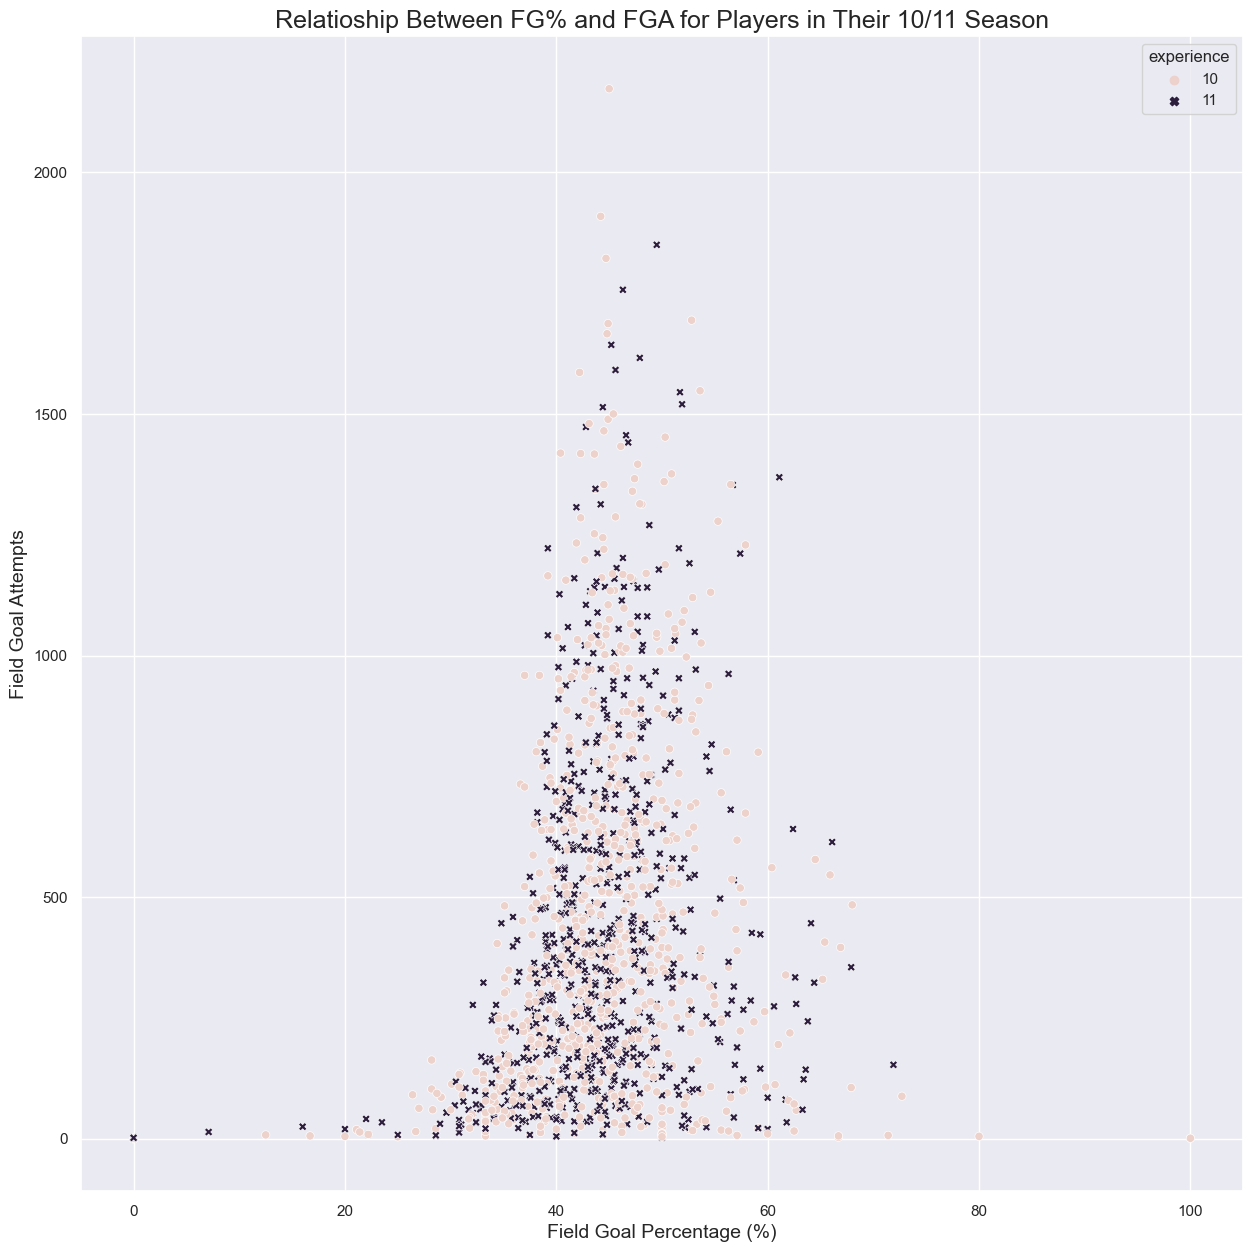

In [533]:
#Creating a scatterplot to illustrate the relationship between FG% adn FGA
sns.scatterplot(data=six, x="fg_percent", y="fga", hue="experience", style='experience')
sns.set(rc={"figure.figsize":(15, 15)});
plt.title('Relatioship Between FG% and FGA for Players in Their 10/11 Season', fontsize=18);
plt.xlabel('Field Goal Percentage (%)', fontsize=14) 
plt.ylabel('Field Goal Attempts', fontsize=14);

## 7 - What is the Average Point and Assists per Season for All Players 19 to 30 Years Old Who Have Played More Than 50 Games in a Season?

#### Gathering Necessary Data

In [609]:
#Removing rows that are lower than 19 years old and higher than 30
seven = player[(player['age'] >= 19) & (player['age'] <=30)]
#Removing rows that are lower than 50 games played
seven = seven[seven['g'] > 50]
#Grouping data by age and getting the avg pts scored
sevens = seven.groupby(['age'])['pts'].mean()
sevens = pd.DataFrame(sevens).reset_index()
#Grouping data by age and getting the avg ast made
sevens_ast = seven.groupby(['age'])['ast'].mean()
sevens_ast = pd.DataFrame(sevens_ast).reset_index()

sevens = sevens.merge(sevens_ast,on='age')
sevens['age'] = sevens['age'].astype(int)
sevens


,age,pts,ast
0,19,658.697917,126.625000
1,20,722.164062,150.332031
2,21,766.929268,153.304878
3,22,741.539763,154.798646
4,23,742.067282,154.931398
5,24,765.910781,157.877323
6,25,790.106061,164.440657
7,26,795.176923,170.737179
8,27,820.237430,180.752793
9,28,812.745098,180.837104


#### Visualization 

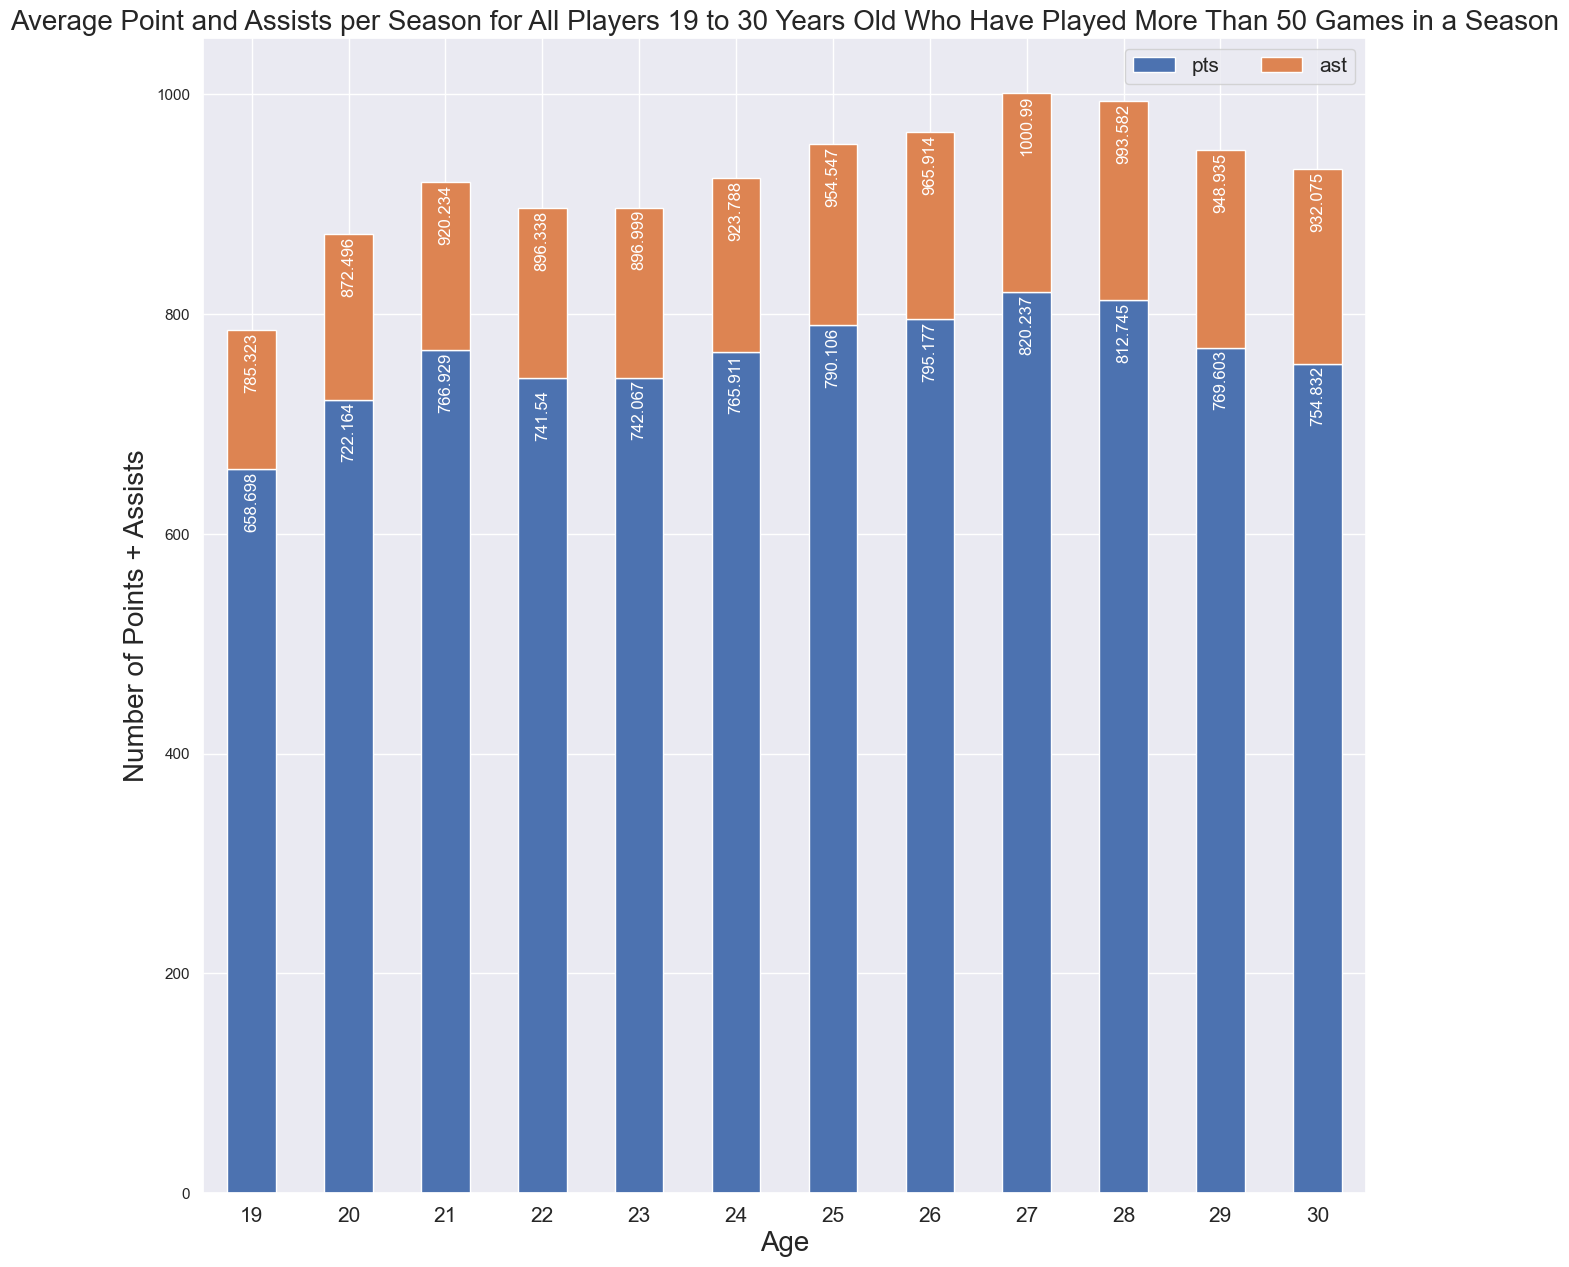

In [622]:
#Creating a stacket bar to illustrate the average # of pts and ast scored bsed on player age
ax = sevens.plot(x='age', kind='bar', stacked=True)
ax.bar_label(ax.containers[0], color='white', rotation=90, padding=-45)
ax.bar_label(ax.containers[1], color='white', rotation=90, padding=-45)
plt.title('Average Point and Assists per Season for All Players 19 to 30 Years Old Who Have Played More Than 50 Games in a Season', fontsize=20)
plt.xlabel('Age', fontsize=20) 
plt.xticks(rotation=0, fontsize=15)
plt.ylabel('Number of Points + Assists', fontsize=20)
plt.legend(loc ='best', ncol=2, fontsize=15)
plt.show();